In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
%matplotlib inline

In [35]:
#Data_set=pd.read_csv("Spam.xls")

with open("spambase/spambase.names") as spam:
 text = spam.read()
labels = re.findall(r'\n(\w*_?\W?):', text)
#labels.append('Class')
df = pd.read_csv("spambase/spambase.data", header=None, names=labels +['spam'])

In [36]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [38]:
#Finding duplicates

df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4596    False
4597    False
4598    False
4599    False
4600    False
Length: 4601, dtype: bool

In [39]:
#Dropping duplicates

df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4210 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4210 non-null   float64
 1   word_freq_address           4210 non-null   float64
 2   word_freq_all               4210 non-null   float64
 3   word_freq_3d                4210 non-null   float64
 4   word_freq_our               4210 non-null   float64
 5   word_freq_over              4210 non-null   float64
 6   word_freq_remove            4210 non-null   float64
 7   word_freq_internet          4210 non-null   float64
 8   word_freq_order             4210 non-null   float64
 9   word_freq_mail              4210 non-null   float64
 10  word_freq_receive           4210 non-null   float64
 11  word_freq_will              4210 non-null   float64
 12  word_freq_people            4210 non-null   float64
 13  word_freq_report            4210 

number of rows in dataset after removing duplicates is 4210

<Figure size 20000x10000 with 0 Axes>

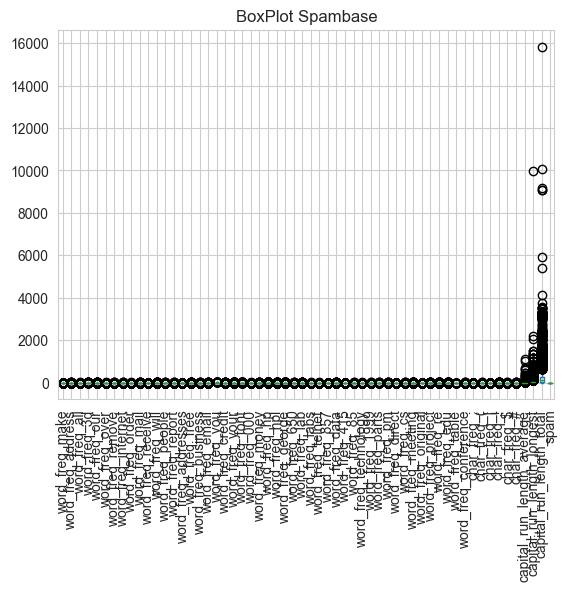

In [40]:
#Finding Outliers

fig = plt.figure(figsize =(200, 100))
df.plot.box(title='BoxPlot Spambase',rot=90) #rot = axis rotation

plt.show()

<AxesSubplot: xlabel='capital_run_length_total'>

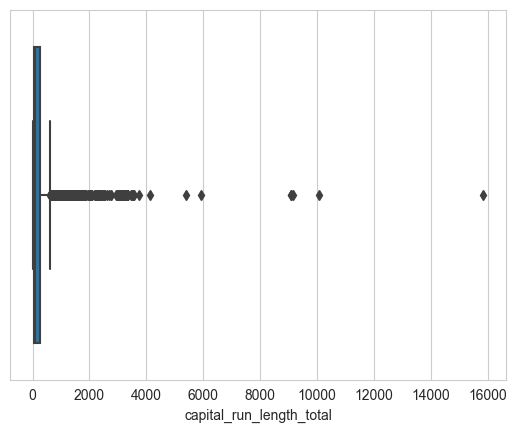

In [41]:
#BoxPlot of capital_run_length_total

import seaborn as sn
sn.boxplot(x = df['capital_run_length_total'])

<AxesSubplot: xlabel='capital_run_length_average'>

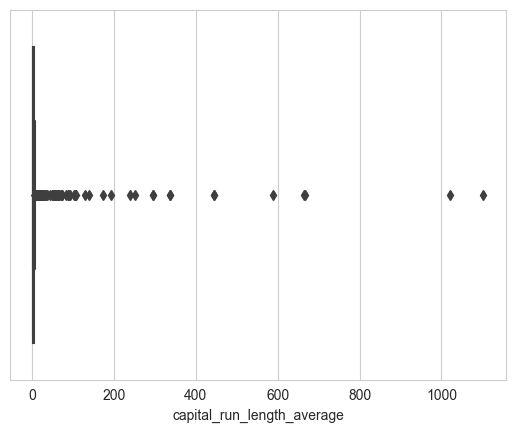

In [42]:
#BoxPlot of capital_run_length_average

sn.boxplot(x = df['capital_run_length_average'])

<AxesSubplot: xlabel='capital_run_length_longest'>

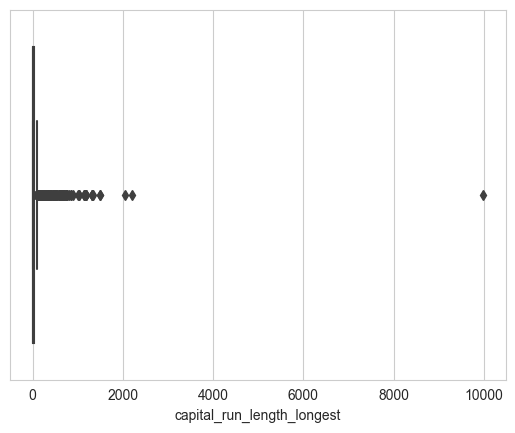

In [43]:
#BoxPlot of capital_run_length_longest

sn.boxplot(x = df['capital_run_length_longest'])

In [44]:
#Using IQR technique to make all outliers to null values

for x in ['capital_run_length_total','capital_run_length_longest','capital_run_length_average']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

<AxesSubplot: xlabel='capital_run_length_total'>

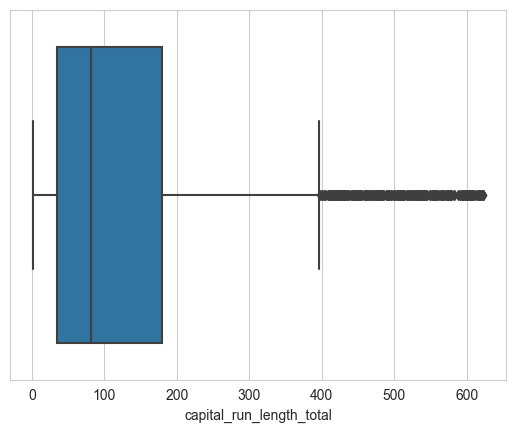

In [45]:
#BoxPlot of capital_run_length_total without outliers

sn.boxplot(x = df['capital_run_length_total'])


<AxesSubplot: xlabel='capital_run_length_average'>

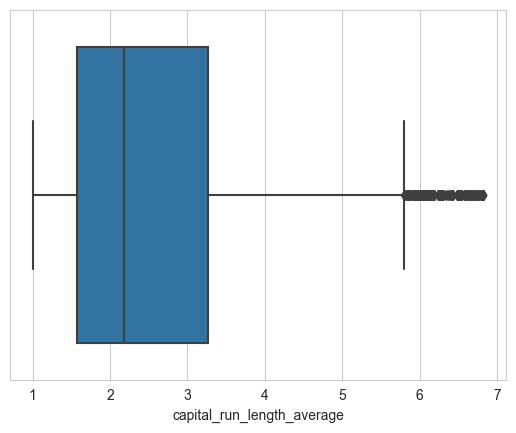

In [46]:
#BoxPlot of capital_run_length_average without outliers

sn.boxplot(x = df['capital_run_length_average'])


<AxesSubplot: xlabel='capital_run_length_longest'>

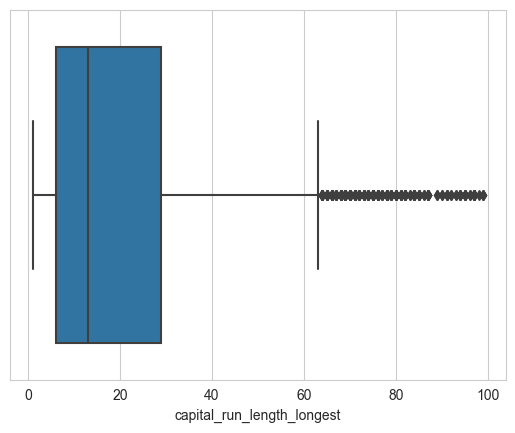

In [47]:
#BoxPlot of capital_run_length_longest without outliers

sn.boxplot(x = df['capital_run_length_longest'])


In [48]:
#Finding null values

df.isnull().sum()

word_freq_make                  0
word_freq_address               0
word_freq_all                   0
word_freq_3d                    0
word_freq_our                   0
word_freq_over                  0
word_freq_remove                0
word_freq_internet              0
word_freq_order                 0
word_freq_mail                  0
word_freq_receive               0
word_freq_will                  0
word_freq_people                0
word_freq_report                0
word_freq_addresses             0
word_freq_free                  0
word_freq_business              0
word_freq_email                 0
word_freq_you                   0
word_freq_credit                0
word_freq_your                  0
word_freq_font                  0
word_freq_000                   0
word_freq_money                 0
word_freq_hp                    0
word_freq_hpl                   0
word_freq_george                0
word_freq_650                   0
word_freq_lab                   0
word_freq_labs

In [49]:
# Drop all rows with NaN values
preprocessed_df=df.dropna(axis=0)

# Reset index after drop
preprocessed_df=df.dropna().reset_index(drop=True)
preprocessed_df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.0,3.756,61.0,278.0,1
1,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.0,3.537,40.0,191.0,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.0,3.537,40.0,191.0,1
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.0,3.000,15.0,54.0,1
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.000,0.054,0.0,0.164,0.054,0.0,1.671,4.0,112.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.0,1.142,3.0,88.0,0
3442,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.0,1.555,4.0,14.0,0
3443,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.0,1.404,6.0,118.0,0
3444,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.0,1.147,5.0,78.0,0


Now it can be seen 3446 rows after removing rows with null values

In [50]:
#Removing the target column

target_dropped_df = preprocessed_df.drop(labels=['spam'], axis=1)
target_dropped_df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.0,0.64,0.64,0.0,0.32,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.0,3.756,61.0,278.0
1,0.0,0.00,0.00,0.0,0.63,0.0,0.31,0.63,0.31,0.63,...,0.0,0.0,0.137,0.0,0.137,0.000,0.0,3.537,40.0,191.0
2,0.0,0.00,0.00,0.0,0.63,0.0,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.0,3.537,40.0,191.0
3,0.0,0.00,0.00,0.0,1.85,0.0,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.0,3.000,15.0,54.0
4,0.0,0.00,0.00,0.0,1.92,0.0,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.0,1.671,4.0,112.0


In [51]:
#Statistical information before Standard Scaling

target_dropped_df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,...,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000
mean,0.094779,0.092716,0.268056,0.005818,0.308175,0.085267,0.093688,0.096164,0.047841,0.201033,...,0.038328,0.033385,0.147309,0.017294,0.233433,0.051662,0.033626,2.362797,18.532792,120.788160
std,0.309801,0.474629,0.529981,0.134848,0.701947,0.281174,0.356036,0.420321,0.222685,0.581086,...,0.326526,0.214935,0.244150,0.112672,0.793952,0.194241,0.459684,1.162791,18.751231,130.389669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.508500,5.000000,31.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.054000,12.000000,76.000000
75%,0.000000,0.000000,0.360000,0.000000,0.360000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.204000,0.000000,0.237000,0.000000,0.000000,2.909000,23.000000,155.000000
max,4.540000,14.280000,5.100000,7.070000,10.000000,5.880000,7.270000,11.110000,5.260000,11.110000,...,10.000000,4.385000,5.277000,4.081000,32.478000,6.003000,19.829000,6.822000,98.000000,623.000000


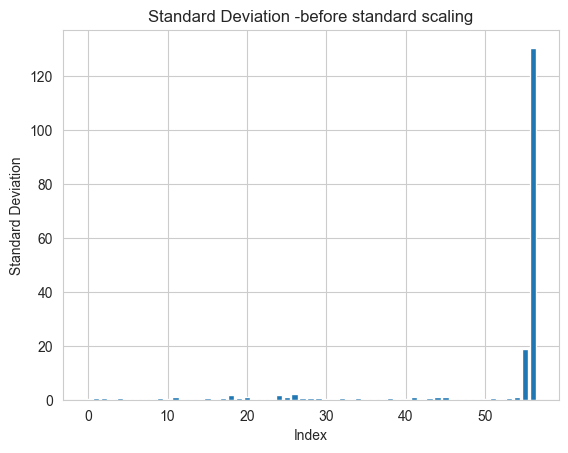

In [52]:
#Standard Deviation before performing Standard Scaling

# Calculate the standard deviation of all columns
sd = target_dropped_df.std()

# Plot the standard deviation of all columns
plt.bar(range(len(sd)), sd)
plt.title("Standard Deviation -before standard scaling")
plt.xlabel("Index")
plt.ylabel("Standard Deviation")
plt.show()

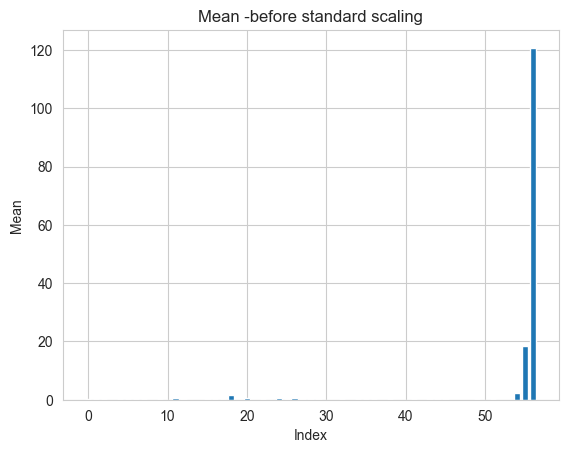

In [53]:
#Mean before performing Standard Scaling

# Calculate the mean of all columns
mean = target_dropped_df.mean()

# Plot the mean of all columns
plt.bar(range(len(mean)), mean)
plt.title("Mean -before standard scaling")
plt.xlabel("Index")
plt.ylabel("Mean")
plt.show()

In [54]:
#Performing Standard Scaling

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_data=scaler.fit_transform(target_dropped_df)
standardized_df=pd.DataFrame(data=scaled_data, columns= target_dropped_df.columns)

In [55]:
#Dataset after performing Standard Scaling

standardized_df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,-0.305981,1.153245,0.701909,-0.043154,0.016849,-0.303297,-0.263181,-0.228820,-0.214868,-0.346011,...,-0.1174,-0.155346,-0.603441,-0.153514,0.685993,-0.266006,-0.07316,1.198328,2.265098,1.205883
1,-0.305981,-0.195373,-0.505857,-0.043154,0.458542,-0.303297,0.607644,1.270253,1.177436,0.738324,...,-0.1174,-0.155346,-0.042229,-0.153514,-0.121477,-0.266006,-0.07316,1.009960,1.145009,0.538555
2,-0.305981,-0.195373,-0.505857,-0.043154,0.458542,-0.303297,0.607644,1.270253,1.177436,0.738324,...,-0.1174,-0.155346,-0.050422,-0.153514,-0.123996,-0.266006,-0.07316,1.009960,1.145009,0.538555
3,-0.305981,-0.195373,-0.505857,-0.043154,2.196817,-0.303297,-0.263181,4.173219,-0.214868,-0.346011,...,-0.1174,-0.155346,0.310064,-0.153514,-0.294056,-0.266006,-0.07316,0.548074,-0.188431,-0.512294
4,-0.305981,-0.195373,-0.505857,-0.043154,2.296554,-0.303297,-0.263181,-0.228820,-0.214868,0.755535,...,-0.1174,-0.155346,-0.382233,-0.153514,-0.087465,0.012040,-0.07316,-0.595032,-0.775144,-0.067409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,0.694807,-0.195373,0.664166,-0.043154,-0.439092,0.799382,-0.263181,-0.228820,-0.214868,-0.346011,...,-0.1174,-0.155346,0.346932,-0.153514,-0.294056,-0.266006,-0.07316,-1.050038,-0.828481,-0.251499
3442,-0.305981,-0.195373,-0.505857,-0.043154,-0.439092,-0.303297,-0.263181,-0.228820,-0.214868,-0.346011,...,-0.1174,-0.155346,-0.603441,-0.153514,0.150619,-0.266006,-0.07316,-0.694806,-0.775144,-0.819111
3443,0.662524,-0.195373,0.060283,-0.043154,-0.439092,-0.303297,-0.263181,-0.228820,-0.214868,-0.346011,...,-0.1174,0.319285,2.337799,-0.153514,-0.294056,-0.266006,-0.07316,-0.824685,-0.668469,-0.021386
3444,2.793236,-0.195373,-0.505857,-0.043154,0.016849,-0.303297,-0.263181,-0.228820,-0.214868,-0.346011,...,-0.1174,-0.155346,-0.369944,-0.153514,-0.294056,-0.266006,-0.07316,-1.045737,-0.721806,-0.328204


In [56]:
#Statistical information after standard scaling

standardized_df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,...,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03,3.446000e+03
mean,-3.299096e-17,-2.474322e-17,7.422965e-17,4.123870e-18,4.948644e-17,-4.948644e-17,-3.299096e-17,2.474322e-17,-2.474322e-17,4.123870e-18,...,-2.474322e-17,-2.061935e-17,6.598191e-17,-4.123870e-18,-2.474322e-17,-8.247739e-17,4.123870e-18,6.598191e-17,-3.299096e-17,1.649548e-17
std,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,...,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00
min,-3.059813e-01,-1.953730e-01,-5.058574e-01,-4.315372e-02,-4.390922e-01,-3.032971e-01,-2.631810e-01,-2.288195e-01,-2.148683e-01,-3.460115e-01,...,-1.173999e-01,-1.553462e-01,-6.034406e-01,-1.535136e-01,-2.940565e-01,-2.660056e-01,-7.316004e-02,-1.172176e+00,-9.351566e-01,-9.188270e-01
25%,-3.059813e-01,-1.953730e-01,-5.058574e-01,-4.315372e-02,-4.390922e-01,-3.032971e-01,-2.631810e-01,-2.288195e-01,-2.148683e-01,-3.460115e-01,...,-1.173999e-01,-1.553462e-01,-6.034406e-01,-1.535136e-01,-2.940565e-01,-2.660056e-01,-7.316004e-02,-7.348022e-01,-7.218063e-01,-6.887140e-01
50%,-3.059813e-01,-1.953730e-01,-5.058574e-01,-4.315372e-02,-4.390922e-01,-3.032971e-01,-2.631810e-01,-2.288195e-01,-2.148683e-01,-3.460115e-01,...,-1.173999e-01,-1.553462e-01,-3.330760e-01,-1.535136e-01,-2.940565e-01,-2.660056e-01,-7.316004e-02,-2.656043e-01,-3.484433e-01,-3.435446e-01
75%,-3.059813e-01,-1.953730e-01,1.735113e-01,-4.315372e-02,7.384151e-02,-3.032971e-01,-2.631810e-01,-2.288195e-01,-2.148683e-01,-3.460115e-01,...,-1.173999e-01,-1.553462e-01,2.322319e-01,-1.535136e-01,4.493408e-03,-2.660056e-01,-7.316004e-02,4.698022e-01,2.382701e-01,2.624196e-01
max,1.435073e+01,2.989567e+01,9.118532e+00,5.239393e+01,1.380907e+01,2.061203e+01,2.015906e+01,2.620720e+01,2.340938e+01,1.877615e+01,...,3.051252e+01,2.024913e+01,2.101344e+01,3.607177e+01,4.061861e+01,3.064342e+01,4.306921e+01,3.835470e+00,4.238588e+00,3.852182e+00


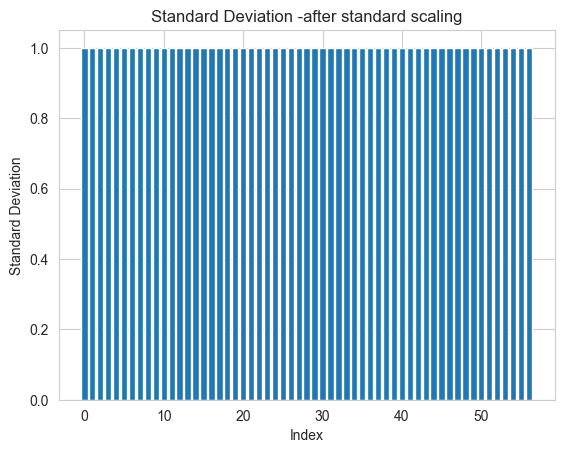

In [57]:
#Standard Deviation after performing Standard Scaling

# Calculate the standard deviation of all columns
sd = standardized_df.std()

# Plot the standard deviation of all columns
plt.bar(range(len(sd)), sd)
plt.title("Standard Deviation -after standard scaling")
plt.xlabel("Index")
plt.ylabel("Standard Deviation")
plt.show()

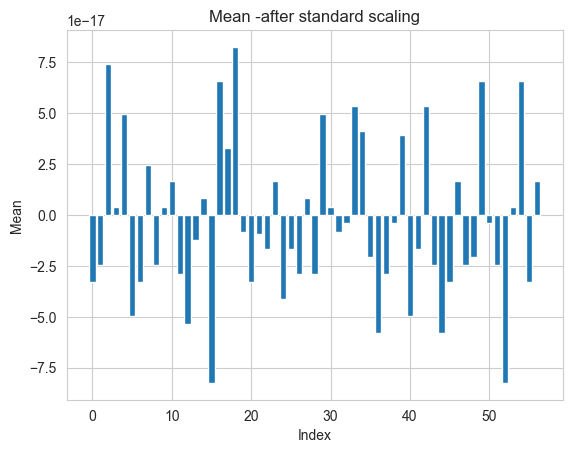

In [58]:
#Mean after performing Standard Scaling

# Calculate the mean of all columns
mean = standardized_df.mean()

# Plot the mean of all columns
plt.bar(range(len(mean)), mean)
plt.title("Mean -after standard scaling")
plt.xlabel("Index")
plt.ylabel("Mean")
plt.show()

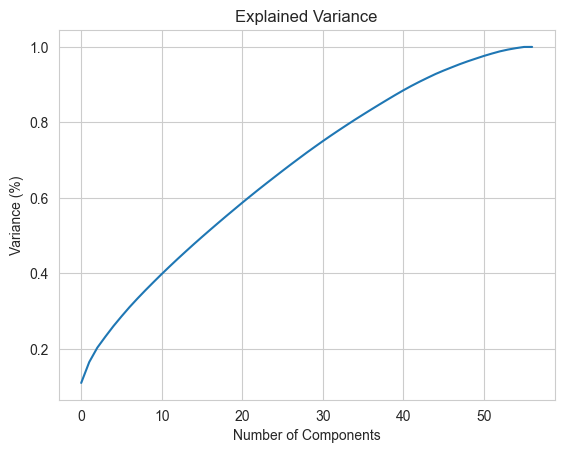

In [59]:
#Performing PCA to dataset

from sklearn.decomposition import PCA
pca = PCA()

principalComponents = pca.fit_transform(standardized_df)

plt.figure()

#Calculate the cumulative sum of the explained variance ratio of each principal component
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component

plt.title('Explained Variance')
plt.grid(True)
plt.show()

In [60]:
#Introducing PCA components
#taking optimal number of components as 44 (reduced number of columns to 44)

pca = PCA(n_components=44)
new_data = pca.fit_transform(standardized_df)

# This will be the new data fed to the algorithm.
pca_df = pd.DataFrame(data = new_data,
                            columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21', 'PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40','PC41','PC42','PC43','PC44'])

4210 rows * 44 columns

In [63]:
#Dataset after performing PCA

pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44
0,-1.006858,1.802158,0.718647,0.075103,-0.217871,-0.058865,-1.193225,-0.853045,1.060100,0.868259,...,-0.124142,0.223680,0.053208,0.543926,-0.015703,0.162308,-0.109925,0.043611,-0.532890,-0.319618
1,-0.985097,1.538500,0.306284,-0.027352,-0.287002,-0.185412,-0.690253,0.207741,-0.356713,-0.197866,...,0.394477,-0.600724,0.333667,0.341918,-0.794686,0.293005,-0.134653,0.074945,0.328360,-0.536970
2,-0.986344,1.538184,0.305694,-0.026642,-0.287280,-0.184841,-0.690865,0.206872,-0.356985,-0.199413,...,0.394220,-0.599627,0.331180,0.344832,-0.795871,0.294317,-0.132345,0.074401,0.327722,-0.536556
3,-0.589456,-0.147102,-0.010617,0.294625,-0.672845,-0.410940,0.165604,0.738413,-1.293736,-0.064301,...,0.346401,-1.153415,1.044353,0.805954,-0.762762,1.205071,0.436872,-0.705798,0.284955,-0.544161
4,-1.147369,0.762932,-1.665308,0.687289,-0.063114,1.574650,-1.343798,-0.179672,-0.196810,-0.557216,...,1.895605,-0.336152,1.361307,-0.603207,0.105906,0.538236,0.400503,1.111311,-0.401440,0.419162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,-0.541648,-1.320157,-0.551824,0.452446,-0.288149,-0.497837,0.169149,0.147439,0.376775,-0.867517,...,0.116746,0.472095,0.451849,-0.338773,-0.312178,-0.304118,0.255578,-0.393136,0.157122,0.328616
3442,-0.934432,-0.987030,-1.272005,-0.126781,1.537320,-0.243416,-0.066383,0.812570,0.844445,-0.507271,...,0.305761,0.440518,-0.278447,0.525308,1.114279,0.494116,-0.993047,0.111552,0.163102,-0.051487
3443,-0.279227,-0.860496,-0.162338,0.119447,0.155892,-0.202241,0.133926,-0.148456,1.331326,-0.828574,...,0.546437,0.496841,1.002091,-1.005251,0.378579,-0.561455,-0.698392,-0.593133,0.172988,-0.022769
3444,-0.713477,-1.124774,-0.833379,0.310054,0.308514,-0.316091,-0.124848,0.220810,0.415820,-0.398606,...,0.941055,-0.206157,0.036582,0.915861,-0.093267,0.185944,-0.435990,-0.195047,-0.241827,-0.131310


In [64]:
print(pca.explained_variance_)

[6.27759756 3.15144097 2.16980778 1.660171   1.59211513 1.46548122
 1.40631189 1.31436087 1.26232732 1.22095863 1.20125118 1.16639666
 1.14251643 1.1155491  1.10047159 1.07449387 1.05814013 1.04458595
 1.03537488 1.01613638 1.01281765 0.9903528  0.97889362 0.95874707
 0.94603977 0.94151907 0.92774737 0.9108982  0.90401138 0.87348346
 0.86262464 0.8373885  0.81823634 0.80176267 0.79146207 0.76600109
 0.75748593 0.74454926 0.73422734 0.72290954 0.70098362 0.66687993
 0.62741618 0.59415216]


In [65]:
print(pca.components_)

[[-3.62468978e-02 -8.29009813e-03 -4.08784908e-02 ...  7.69077982e-03
  -4.49900022e-02 -3.78590780e-02]
 [ 1.04736040e-01  6.97925045e-02  1.03400661e-01 ...  3.47520475e-01
   3.77154974e-01  2.99493701e-01]
 [-8.99525824e-02 -4.32233313e-02 -9.56669204e-02 ...  3.19026114e-01
   2.69985209e-01  3.18900355e-01]
 ...
 [-2.07796572e-01  2.88162110e-01 -4.35631638e-02 ... -1.14818225e-01
  -4.76581154e-02  1.28816882e-01]
 [-2.97435950e-02  2.66703308e-01  3.15665529e-02 ... -1.35885727e-02
   2.30628059e-02 -1.07988829e-04]
 [-1.44325231e-02  5.60029845e-03  7.46333785e-02 ... -2.97845184e-02
  -2.71702167e-02 -1.03193808e-02]]


In [66]:
# Defining Independent variable and Dependant variable

X = pca_df.iloc[:,0:44].values
y = preprocessed_df.iloc[:, 57].values

# KNN Classifier

In [557]:
# Splitting the dataset into the Training set and Testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [558]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Perform grid search to find optimal value of k
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print optimal value of k
optimal_k_value = grid_search.best_params_['n_neighbors']
print('Optimal value of k:', optimal_k_value)

Optimal value of k: 7


In [559]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=optimal_k_value, metric='minkowski', p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [560]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [561]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[648,  28],
       [ 74, 284]], dtype=int64)

Text(113.9222222222222, 0.5, 'Predicted label')

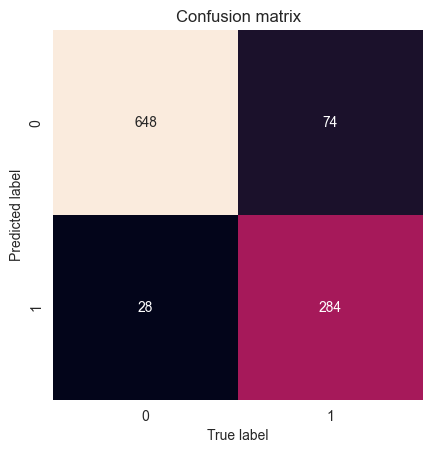

In [562]:
# based on test values generate the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Summary of the predictions made by the classifier
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

plt.title('Confusion matrix')
plt.xlabel('True label')
plt.ylabel('Predicted label')

In [563]:
# Generate summary of the prediction (Classification Report) made by the classifier
from sklearn.metrics import classification_report

print('Classification Report : \n')
print(classification_report(y_test, y_pred)) #support - no. of samples in the test set

Classification Report : 

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       676
           1       0.91      0.79      0.85       358

    accuracy                           0.90      1034
   macro avg       0.90      0.88      0.89      1034
weighted avg       0.90      0.90      0.90      1034



In [564]:
# Accuracy score of the testing data
from sklearn.metrics import accuracy_score
print("KNN accuracy of testing dataset : ",accuracy_score(y_pred,y_test)*100)

KNN accuracy of testing dataset :  90.13539651837525


In [565]:
# Accuracy score of the training data
y_pred2 = classifier.predict(X_train)
print("KNN accuracy of training dataset : ", accuracy_score(y_pred2, y_train) * 100)


KNN accuracy of training dataset :  92.24709784411277


# Decision Tree Model

In [566]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [567]:
# Fitting classifier to the Training set

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0,criterion='gini')
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [568]:
#Accuracy of testing data

from sklearn.metrics import accuracy_score

predictions_test=clf.predict(X_test)
print("Decision Tree accuracy of testing dataset : ",accuracy_score(y_test,predictions_test)*100)

Decision Tree accuracy of testing dataset :  87.10144927536231


In [569]:
#Accuracy of training data

predictions_train = clf.predict(X_train)
print("Decision Tree accuracy of training dataset : ",accuracy_score(y_train,predictions_train)*100)

Decision Tree accuracy of training dataset :  99.92743105950653


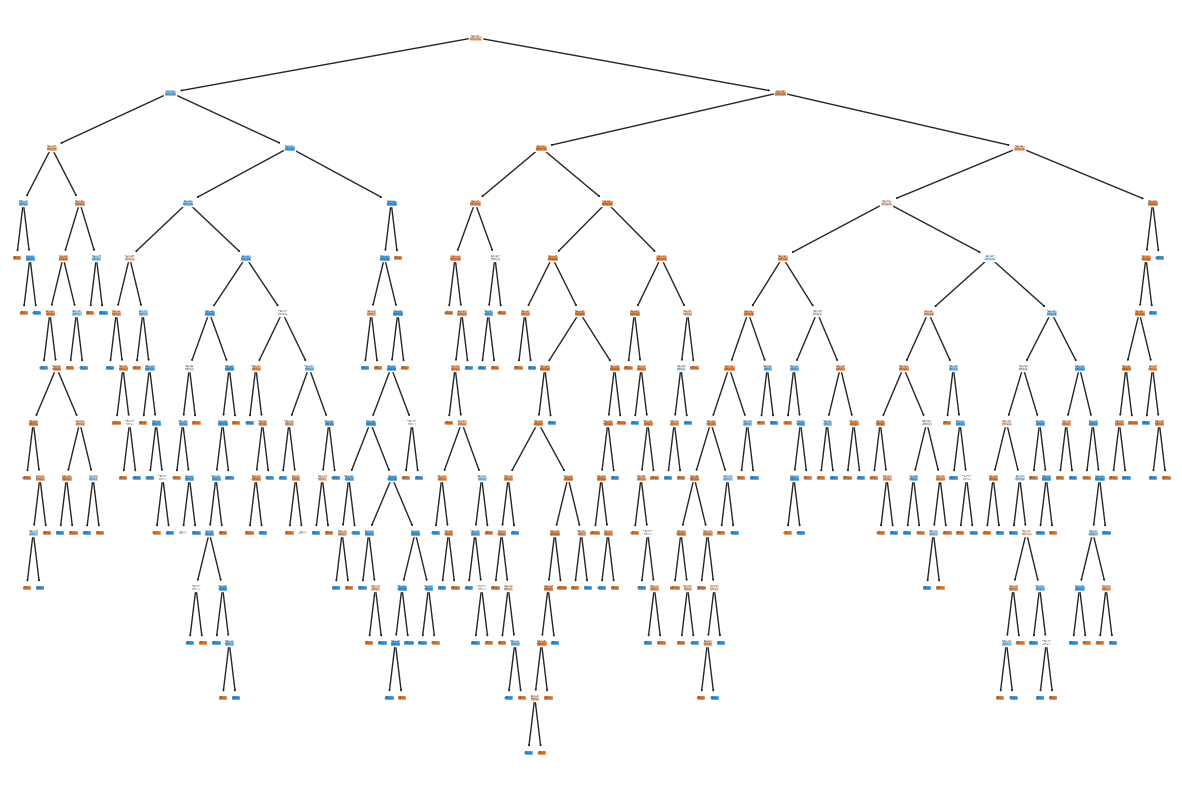

In [570]:
#Visualizing the decision tree

from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

Since there is a considerable gap betweet testing accuracy and training accuracy model has to be called overfitted. Pruning of decision tree will solve this issue.

In [571]:
# Pruning the decision tree

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

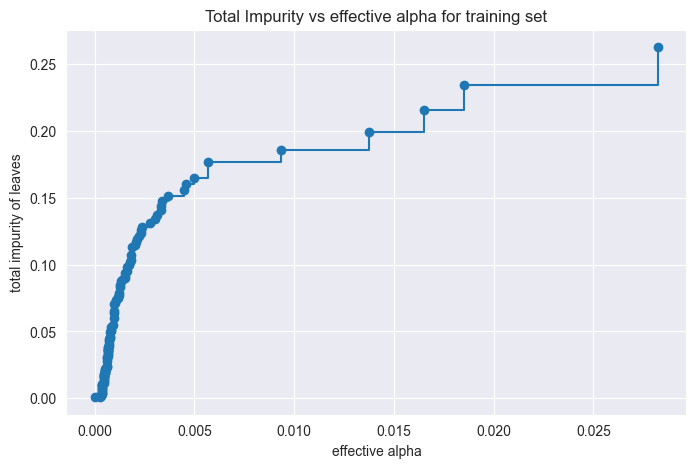

In [572]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [573]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.003)#elbow point
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.003, random_state=0)

In [574]:
#Accuracy of testing data after pruning

predictions_test=clf.predict(X_test)
print("Accuracy of testing data after pruning : ",accuracy_score(y_test,predictions_test)*100)

Accuracy of testing data after pruning :  87.82608695652175


In [575]:
#Accuracy of training data after pruning

predictions_train = clf.predict(X_train)
print("Accuracy of training data after pruning : ",accuracy_score(y_train,predictions_train)*100)

Accuracy of training data after pruning :  91.8722786647315


In [576]:
# Classification report

print('Classification Report : \n')
print(classification_report(y_test,predictions_test))

Classification Report : 

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       450
           1       0.85      0.79      0.82       240

    accuracy                           0.88       690
   macro avg       0.87      0.86      0.86       690
weighted avg       0.88      0.88      0.88       690



Text(113.9222222222222, 0.5, 'predicted label')

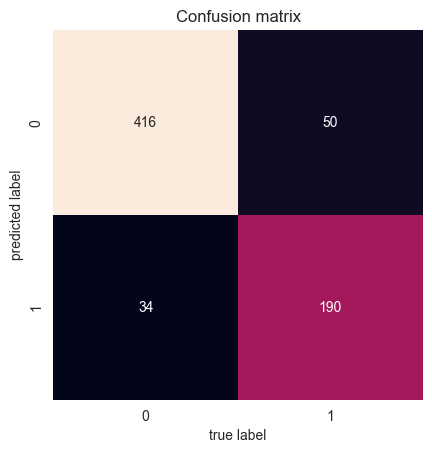

In [577]:
# Confusion Matrix

mat = confusion_matrix(y_test, predictions_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

plt.title('Confusion matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')

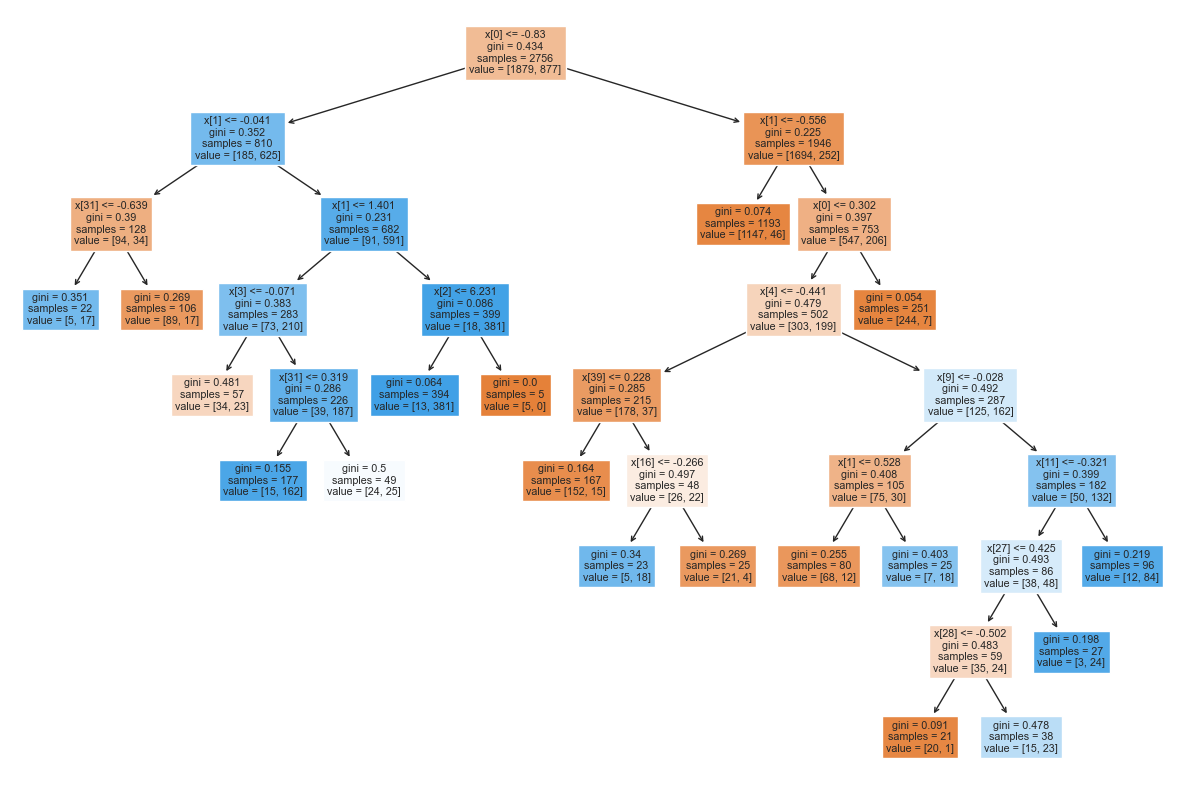

In [578]:
# Final decision tree after pruning

plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()